Univariate Linear Regression from Scratch
This notebook implements univariate linear regression using NumPy

In [2]:
import numpy as np

# Example data: sizes (x) and prices (y)
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([7,10,13,16,19,22,25,28,31,34])

def compute_cost(x, y, w, b):
    """Compute mean squared error cost for linear regression."""
    m = len(x)
    total_cost = 0
    for i in range(m):
        y_pred = w * x[i] + b
        total_cost += (y_pred - y[i]) ** 2
    # Return average half MSE so the derivative is nice (1/(2m))
    return total_cost / (2 * m)

print(compute_cost(x, y, 100, 200))

304897.25


### Cost function explanation
The `compute_cost` function calculates the mean squared error (MSE) divided by 2 (i.e. 1/(2m) * sum((y_pred - y)^2)).
Inputs: `x` (features), `y` (targets), `w` (weight), `b` (bias).
Output: scalar cost.
Why divide by 2m? It simplifies the gradient expressions (derivative of squared error includes a 2 that cancels).
Complexity: O(m) where m is the number of examples.

Less cost means better model

Finding the best w and b

In [3]:
def compute_gradient(x , y, w, b):
    """Compute gradients (dj_dw, dj_db) for linear regression."""
    m = len(x)
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        y_pred = w * x[i] + b
        dj_dw += (y_pred - y[i]) * x[i]
        dj_db += (y_pred - y[i])
    
    dj_dw /= m
    dj_db /= m
    return dj_dw , dj_db
def gradient_descent(x , y , w , b , alpha , num_iterator):
    for i in range(num_iterator):
        dj_dw , dj_db = compute_gradient(x ,y , w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        if i % 100 == 0:
            print(f"Itaration:{i} w:={w} b:={b}")
    return w , b

# WARNING: very large iteration count will take a long time. Use smaller counts for experimentation.
w , b = gradient_descent(x , y , 0 , 0 , alpha=0.001 , num_iterator=1000)
print(f"Optimized w:={w} b:={b}")

Itaration:0 w:=0.1375 b:=0.0205
Itaration:100 w:=3.4306401109796894 b:=0.5676816864196809
Itaration:200 w:=3.4804296232195457 b:=0.6474457325318768
Itaration:300 w:=3.4715128183106776 b:=0.7172682200833771
Itaration:400 w:=3.4617337203853866 b:=0.7854892539794522
Itaration:500 w:=3.452138812014106 b:=0.8522898573320101
Itaration:600 w:=3.4427429491887844 b:=0.9177022317480243
Itaration:700 w:=3.433542334939885 b:=0.981755274678086
Itaration:800 w:=3.42453291798342 b:=1.0444772351928513
Itaration:900 w:=3.415710725172036 b:=1.1058957744513171
Optimized w:=3.407157359482963 b:=1.1654427870360153


### Gradient and Gradient Descent explanation
`compute_gradient` returns the partial derivatives of the cost w.r.t. `w` and `b` (averaged over examples).
`gradient_decent` (named with a small typo in this notebook) repeatedly updates `w` and `b` by stepping in the negative gradient direction scaled by the learning rate `alpha`.
Tuning notes:
- `alpha` (learning rate): too large -> divergence; too small -> very slow convergence.
- `num_itarator`: number of updates/iterations. For testing, try small values (e.g., 1000) first.
- Print statements show progress every 100 iterations in the current implementation.

In [4]:
model_cost = compute_cost(x , y , 100 , 200)
print(f"model cost before gradient decent:{model_cost}")
model_cost_optimized = compute_cost(x , y, w , b)
print(f"model cost after gradient decent:{model_cost_optimized}")

model cost before gradient decent:304897.25
model cost after gradient decent:0.8609572021340812


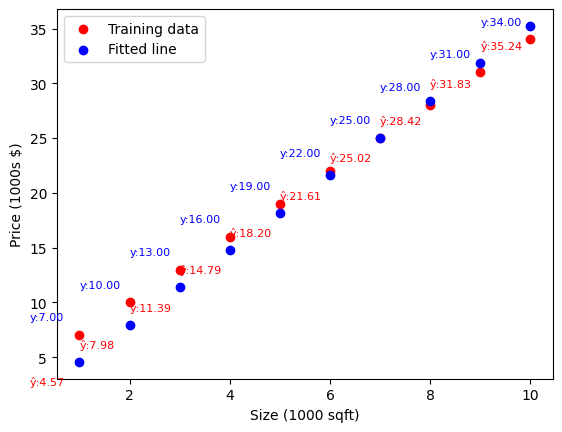

In [7]:
import matplotlib.pyplot as plt
prediction = w * x + b
plt.scatter(x, y, color='red', label='Training data')
plt.scatter(x, prediction , color='blue', label='Fitted line' ,)
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (1000s $)")
plt.legend()
annotate = True  # set True if you really want labels
if annotate:
    dy = (y.max() - y.min())
    for i in range(len(y)):
        plt.text(i, y[i] + 0.05 * dy, f"y:{y[i]:.2f}", color='blue', fontsize=8)
        plt.text(i, prediction[i] - 0.08 * dy, f"ŷ:{prediction[i]:.2f}", color='red', fontsize=8)
plt.show()


### Prediction (model output)
Once `w` and `b` are learned, you can predict new `y` values using `y = w * x + b`.
The helper `model_output` below works with scalars or NumPy arrays (NumPy broadcasting will apply).

In [6]:
def model_output(x , w ,b):
    return w * x + b

new_house_size = 1
new_house_price = model_output(new_house_size , w, b)
print(f"A House  of size {new_house_size} price should be {new_house_price}")

A House  of size 1 price should be 4.572600146518979
